In [2]:
import numpy as np
import matplotlib.pyplot as plt

average == 6.59


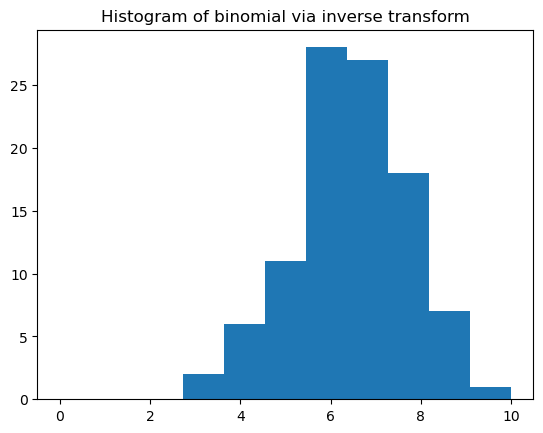

In [3]:
## Problem 1

def simulate_trial(n, p):
   u = np.random.uniform(0, 1)
   cdf = np.power(1-p, n)
   p_k = cdf
   x = 0

   while (u > cdf):
      p_k = p_k * (p/(1-p)) * ((n-x)/(x+1))
      cdf += p_k
      x += 1
   
   return x


result = np.zeros(100)

for i in range(100):
   result[i] = simulate_trial(10, 2/3)


sample_average = sum(result)/len(result)
print("average == " + sample_average.astype(str))

plt.hist(result, bins=11, range=(0, 10))
plt.title("Histogram of binomial via inverse transform")
plt.show()


In [4]:
## Problem 2
# simulating a negative binomial variable

# negative binomial via inverse transform
def inverse_transform(r, p):
    u = np.random.uniform(0, 1)
    cdf = np.power(p, r)
    p_k = cdf
    x = r
    while (u > cdf):
        p_k = p_k * (x * (1-p) / (x - r + 1))
        cdf += p_k
        x += 1
    return x

# negative binomial via sum of r iid Geom(p) variables
def sum_geom(r, p):
    x = 0
    for i in range(0, r):
        x += np.random.geometric(p)
    return x

#negative binomial via sum of bernoullis
def sum_bern(r, p):
    sum = 0
    count = 0
    while (sum < r):
        count += 1
        if (np.random.uniform(0, 1) < p):
            sum += 1
    return count

In [5]:
# set parameters
R = 2
P = 1/3
N = 100

#run simulation
result_inverse = np.zeros(N)
result_geom = np.zeros(N)
result_bern = np.zeros(N)

for i in range(N):
    result_inverse[i] = inverse_transform(R, P)
    result_geom[i] = sum_geom(R, P)
    result_bern[i] = sum_bern(R, P)

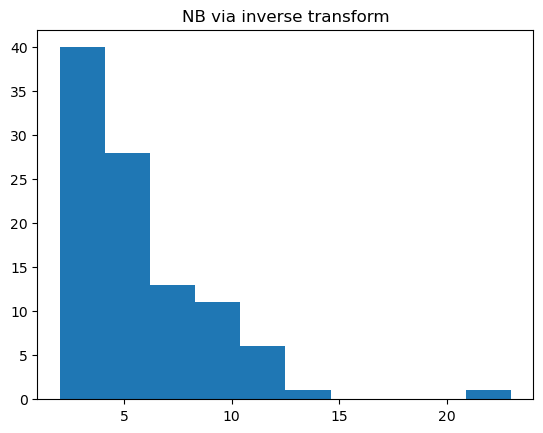

In [6]:
# histogram for inverse transform
plt.hist(result_inverse)
plt.title("NB via inverse transform")
plt.show()

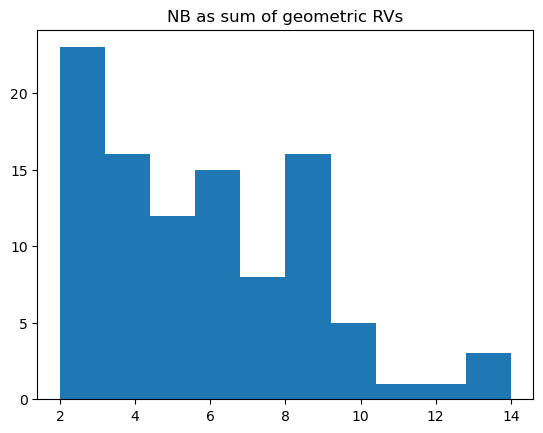

In [7]:
# hist for geom.
plt.hist(result_geom)
plt.title("NB as sum of geometric RVs")
plt.show()

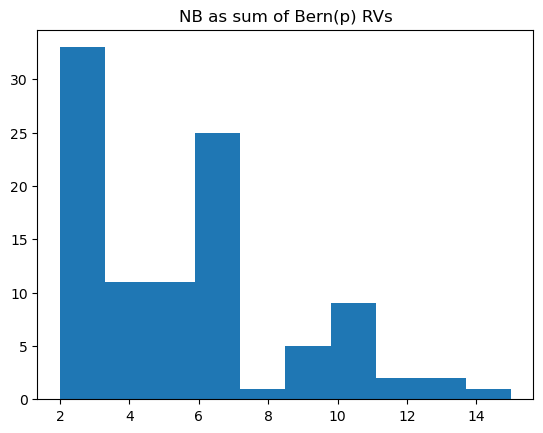

In [8]:
# hist for bern.
plt.hist(result_bern)
plt.title("NB as sum of Bern(p) RVs")
plt.show()

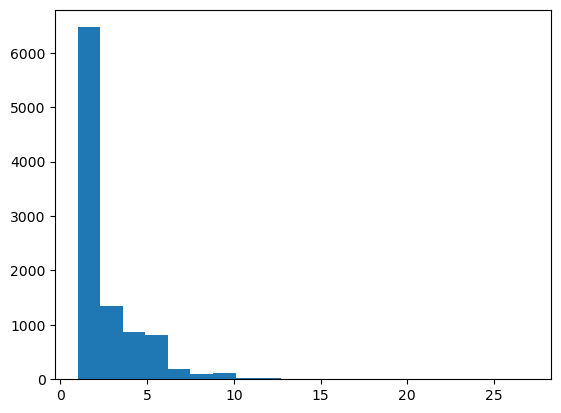

In [20]:
## Problem 3

def simulate_q3():
    u = np.random.uniform(0, 1)
    cdf = (1/2)**(1+1) + (1/2)*(1/3)
    x = 1
    while (u > cdf):
        x += 1
        p_k = (1/2)**(x+1) + (1/2)*((2**(x-1))/(3**x))
        cdf += p_k
    return x

N = 10000
result = np.zeros(N)
for i in range(N):
    result[i] = simulate_q3()

plt.hist(result, bins=20)
plt.show()

average: 15.5


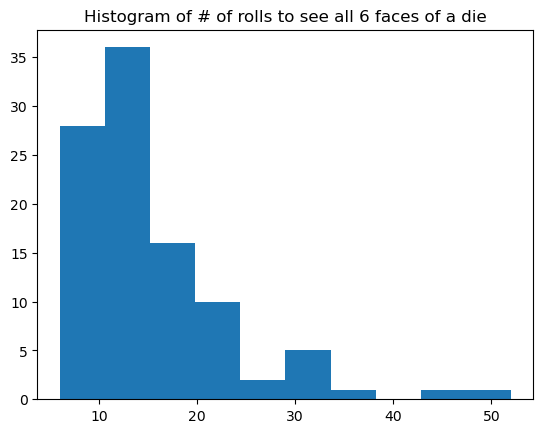

In [10]:
## Problem 4

target = {1, 2, 3, 4, 5, 6}
def simulate_q4():
    seen = set()
    count = 0
    while (len(seen) < 6):
        test = np.random.randint(1, 7)
        if test not in seen:
            seen.add(test)
        count += 1
    return count


N = 100
result = np.zeros(N)

for i in range(N):
    result[i] = simulate_q4()

print("average: " + (sum(result)/len(result)).astype(str))
plt.hist(result)
plt.title("Histogram of # of rolls to see all 6 faces of a die")
plt.show()